In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.optimizers as optimizers
import os
import cv2
from tensorflow.keras import backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
#load dataset
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train, y_train) = (X_train[:], y_train[:])

print("Shape X_train: ", X_train.shape)
print("Shape y_train: ", y_train.shape)
print("Shape X_test: ", X_test.shape)
print("Shape y_test: ", y_test.shape)

Shape X_train:  (60000, 28, 28)
Shape y_train:  (60000,)
Shape X_test:  (10000, 28, 28)
Shape y_test:  (10000,)


In [3]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

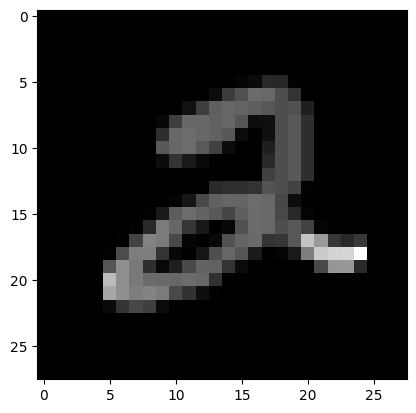

In [4]:
plt.imshow(X_train[5], cmap='gray')

In [5]:
#build model CNN

model = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')        
    ]
)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10)

f:\Nam_3\WorkshopAIForTBier\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.9281 - loss: 0.2353
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9736 - loss: 0.0905
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9798 - loss: 0.0662
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9840 - loss: 0.0534
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9866 - loss: 0.0438
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9882 - loss: 0.0386
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9895 - loss: 0.0322
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9910 - loss: 0.0292
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9916 - loss: 0.0261
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9929 - loss: 0.0215


In [6]:
model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9928 - loss: 0.0316


[0.03160553798079491, 0.9927999973297119]

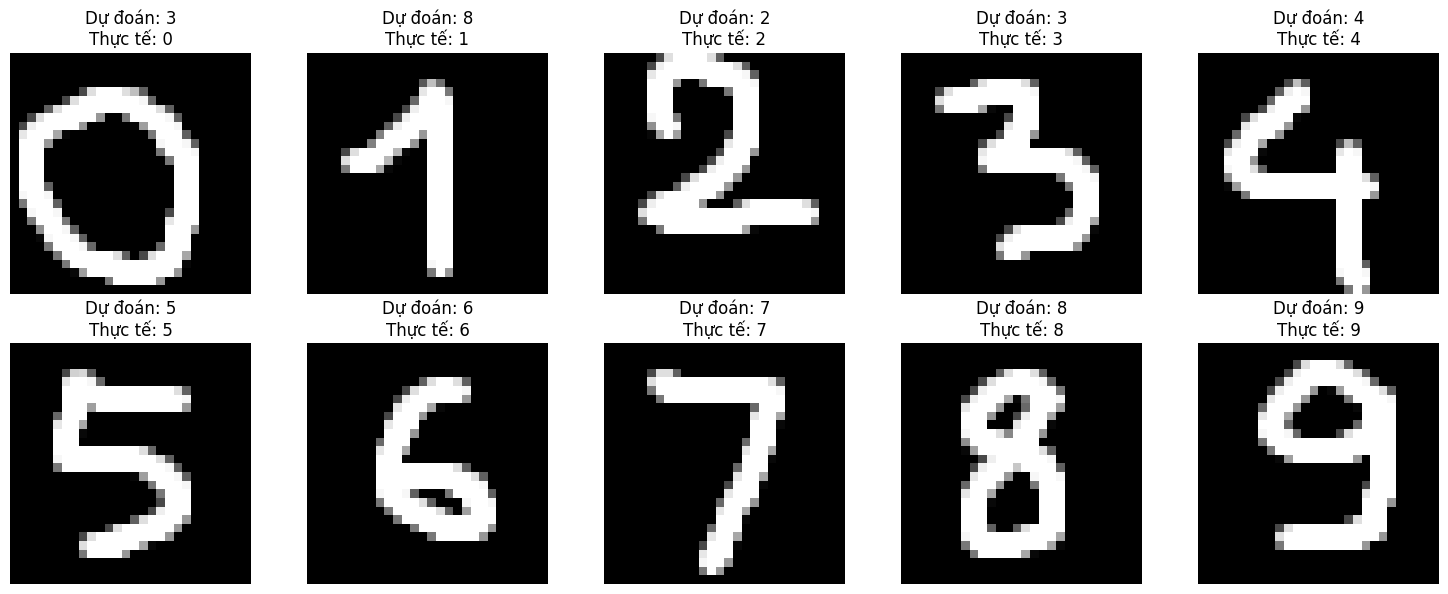


Bạn đã dự đoán đúng 8 / 10 chữ số
Độ chính xác: 80.0%


In [8]:
# Test on my data
images = []
predictions = []
true_labels = []
index = 0

# Thu thập tất cả ảnh và dự đoán
while os.path.exists(f'test3/{index}.png'):
    img = cv2.imread(f'test3/{index}.png', cv2.IMREAD_GRAYSCALE)
    img = np.invert(np.array(img))
    img_reshaped = img.reshape(1, 28, 28, 1)
    y_pred = model.predict(img_reshaped, verbose=0)
    
    images.append(img)
    predictions.append(np.argmax(y_pred))
    true_labels.append(index)
    index += 1

# Hiển thị tất cả ảnh cùng lúc
plt.figure(figsize=(15, 6))
for i in range(len(images)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Dự đoán: {predictions[i]}\nThực tế: {true_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Tính độ chính xác
count = sum(1 for i in range(len(predictions)) if predictions[i] == true_labels[i])
print(f"\nBạn đã dự đoán đúng {count} / {len(images)} chữ số")
print(f"Độ chính xác: {count/len(images)*100:.1f}%")